# **Which Individuals Are Most Likely To Have Or Use A Bank Account In Eastern Africa ?**

## Read the data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

In [20]:
# Datasets

financial = pd.read_csv("train.csv")

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0


## Checking the data

In [3]:
# number of rows and columns

financial.shape

(23524, 39)

## Data cleaning

In [10]:
# drop irrelevant fields

financial.drop(['year_'], axis=1, inplace=True)
financial

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
# checking for null values
financial.isnull().sum()

Unnamed: 0                                         0
bank_account                                       0
location_type                                      0
cellphone_access                                   0
household_size                                     0
age_of_respondent                                  0
gender_of_respondent                               0
relationship_with_head_Child                       0
relationship_with_head_Head of Household           0
relationship_with_head_Other non-relatives         0
relationship_with_head_Other relative              0
relationship_with_head_Parent                      0
relationship_with_head_Spouse                      0
marital_status_Divorced/Seperated                  0
marital_status_Dont know                           0
marital_status_Married/Living together             0
marital_status_Single/Never Married                0
marital_status_Widowed                             0
education_level_No formal education           

In [12]:
# drop null values
fin = financial.dropna()
fin.isnull().sum()

Unnamed: 0                                         0
bank_account                                       0
location_type                                      0
cellphone_access                                   0
household_size                                     0
age_of_respondent                                  0
gender_of_respondent                               0
relationship_with_head_Child                       0
relationship_with_head_Head of Household           0
relationship_with_head_Other non-relatives         0
relationship_with_head_Other relative              0
relationship_with_head_Parent                      0
relationship_with_head_Spouse                      0
marital_status_Divorced/Seperated                  0
marital_status_Dont know                           0
marital_status_Married/Living together             0
marital_status_Single/Never Married                0
marital_status_Widowed                             0
education_level_No formal education           

In [13]:
# checking for duplicates
fin.duplicated().sum()

0

In [14]:
# drop duplicates
df1 = fin.drop_duplicates()
df1

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


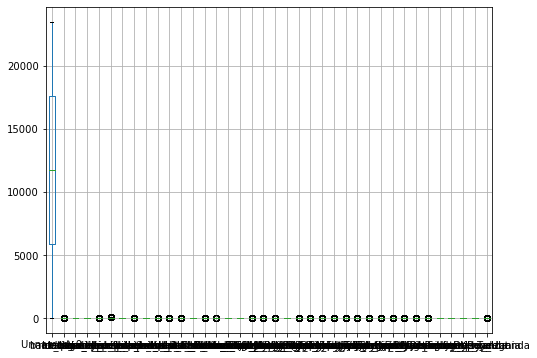

In [32]:
# # checking for outliers
# df1.boxplot(figsize=(8, 6), fontsize=10)

# # print size of the data with outliers present
# print("size of the data with outliers present : " + str(df1.shape))

# print("")

# # removing outliers
# Q1 = df1.quantile(0.25)
# Q3 = df1.quantile(0.75)
# IQR = Q3 - Q1
# df = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# # print size of the data after removal of outliers
# print("size of the data with outliers present : " + str(df.shape))

# checking for outliers 
df1.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(df1.shape)

print("********************************************")

# removing outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# print size of the data after removal of outliers
print(df.shape)


<AxesSubplot:>

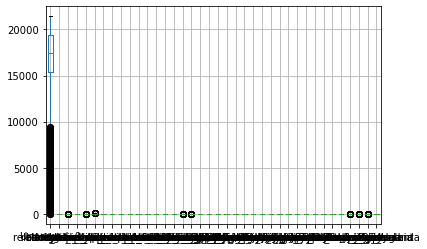

In [17]:
# plot of the new data, without ouliers
df.boxplot()

In [18]:
# checking for anomalies
# getting the quantiles
q1_house = df['household_size'].quantile(.25)
q3_house = df['household_size'].quantile(.75)

# calculating inter-quartile range using values from above
iqr_31_house = q3_house - q1_house

# another way is to find quantiles using the percentiles from the numpy library
q1_h, q3_h = np.percentile(df['household_size'], [25, 75]) 
# IQR
iqr_31_h = q3_h - q1_h

# compare if the two values are similar
print(iqr_31_house, iqr_31_h)

1.0 1.0


In [19]:
# getting to know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2379 entries, 6 to 21422
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Unnamed: 0                                       2379 non-null   int64
 1   bank_account                                     2379 non-null   int64
 2   location_type                                    2379 non-null   int64
 3   cellphone_access                                 2379 non-null   int64
 4   household_size                                   2379 non-null   int64
 5   age_of_respondent                                2379 non-null   int64
 6   gender_of_respondent                             2379 non-null   int64
 7   relationship_with_head_Child                     2379 non-null   int64
 8   relationship_with_head_Head of Household         2379 non-null   int64
 9   relationship_with_head_Other non-relatives       23

# **COPY**